In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [40]:
df = pd.read_csv("balanced_migraine_data.csv")

In [41]:
df=df.drop_duplicates()

In [42]:
df.shape

(953, 24)

In [52]:
features = df.select_dtypes(include=['number']).columns
df = df[features]
print(df.head())

   Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Paresthesia  DPF  Type  
0       0   

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

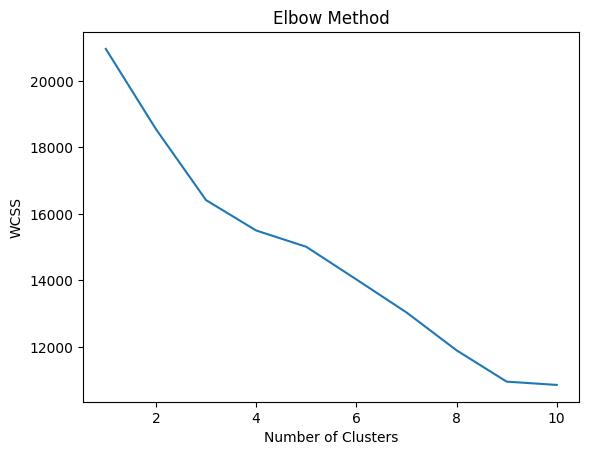

In [47]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [54]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [56]:
df['Clusters'] = clusters
print(df.head())

   Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Tinnitus  Hypoacusis  Diplopia  Defect  \
0            1            1  ...         0           0         0       0   
1            1            1  ...         0           0         0       0   
2            1            1  ...         0           0         0       0   
3            1            1  ...         0           0         0       0   
4            1            1  ...         0           0         0       0   

   Ataxia  Conscience  Paresthesia  DPF  Type  Clusters  
0       0       

In [58]:
type(df)

pandas.core.frame.DataFrame

In [60]:
cluster_analysis = df.groupby('Clusters').mean()
print(cluster_analysis)

                Age  Duration  Frequency  Location  Character  Intensity  \
Clusters                                                                   
0         26.194915  1.542373   2.313559  0.000000   0.000000   0.000000   
1         28.075581  1.467054   1.401163  1.009690   1.007752   2.465116   
2         35.560606  1.717172   4.318182  1.010101   1.005051   2.823232   
3         38.330579  1.545455   1.644628  1.330579   1.512397   3.000000   

            Nausea     Vomit  Phonophobia  Photophobia  ...   Vertigo  \
Clusters                                                ...             
0         0.932203  0.161017     1.000000     1.000000  ...  0.118644   
1         0.990310  0.155039     0.986434     1.000000  ...  0.242248   
2         1.000000  0.484848     1.000000     1.000000  ...  0.025253   
3         0.586777  0.198347     0.099174     0.165289  ...  0.198347   

          Tinnitus  Hypoacusis  Diplopia    Defect  Ataxia  Conscience  \
Clusters                      

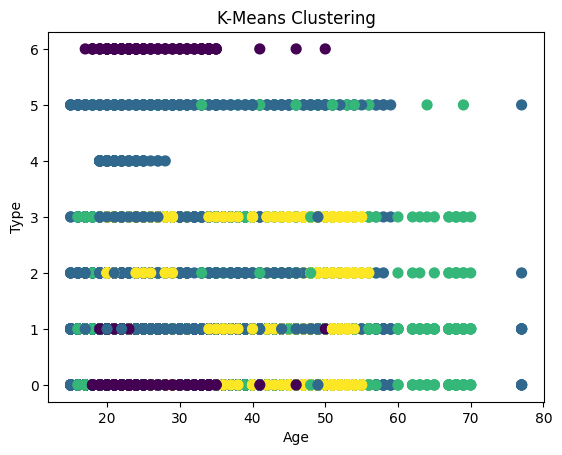

In [79]:
plt.scatter(df['Age'], df['Type'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Character'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Sensory'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Phonophobia'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Photophobia'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Intensity'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Nausea'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Vomit'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Location'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Vertigo'], c=clusters, cmap='viridis', s=50)
plt.scatter(df['Age'], df['Paresthesia'], c=clusters, cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Type')
plt.title('K-Means Clustering')
plt.title('K-Means Clustering')
plt.show()